### Student Information

#### **Name:** Victor D. Lopez

#### **Student ID:** 110062426

#### **GitHub ID:** vlopez0392

---

### Instructions

1. First: do the **take home** exercises in the [DM2023-Lab1-Master](https://github.com/fjrialdnc0615/DM2023-Lab1-Master). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2023-Lab1-Master](https://github.com/fjrialdnc0615/DM2023-Lab1-Master) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The dataset contains a `sentence` and `score` label. Read the specificiations of the dataset for details. You need to combine three labeled datasets into one file for your data preparation part.
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas.
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be habdled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/fjrialdnc0615/DM2023-Lab1-Master/blob/main/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 27th 11:59 pm, Thursday)__.

## **PART I: Take-Home Exercises**

In [206]:
# TEST necessary for when working with external scripts
%load_ext autoreload
%autoreload 2

# Imports
from sklearn.datasets import fetch_20newsgroups
import pandas as pd
import helpers.data_mining_helpers as dmh

categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']
twenty_train = fetch_20newsgroups(subset='train', categories=categories, shuffle=True, random_state=42)

## Construct dataframe from a list
X = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns = ["text"]);

### Adding category and category names
X["category"] = twenty_train.target;
X["category_name"] = X.category.apply(lambda t: dmh.format_labels(t, twenty_train));

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### **Exercise 2**

Experiment with other querying techniques using pandas dataframes.

**SOLUTION:**

For instance, we may use **Selection by callable** using a callable anonymous function with the dataframe as argument which returns valid output for indexing. We solve Exercise 3 in an alternative fashion with this query technique as follows:

In [207]:
###EXERCISE 2

X.loc[lambda df: df['category'] == 2][::10][:5]

,text,category,category_name
7,From: aldridge@netcom.com (Jacquelin Aldridge)...,2,sci.med
49,From: jimj@contractor.EBay.Sun.COM (Jim Jones)...,2,sci.med
82,From: jason@ab20.larc.nasa.gov (Jason Austin) ...,2,sci.med
118,From: rogers@calamari.hi.com (Andrew Rogers) S...,2,sci.med
142,From: lady@uhunix.uhcc.Hawaii.Edu (Lee Lady) S...,2,sci.med


### **Exercise 5**

When we are working with extremely large data, it's difficult to check records one by one (as we have been doing so far). And also, we don't even know what kind of missing values we are facing. Thus, "debugging" skills get sharper as we spend more time solving bugs. Let's focus on a different method to check for missing values and the kinds of missing values you may encounter. It's not easy to check for missing values as you will find out in a minute.

Please check the data and the process below, describe what you observe and why it happened.


In [208]:
import numpy as np

NA_dict = [{ 'id': 'A', 'missing_example': np.nan },
           { 'id': 'B'                    },
           { 'id': 'C', 'missing_example': 'NaN'  },
           { 'id': 'D', 'missing_example': 'None' },
           { 'id': 'E', 'missing_example':  None  },
           { 'id': 'F', 'missing_example': ''     }]

NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])
NA_df

,id,missing_example
0,A,NaN
1,B,NaN
2,C,NaN
3,D,None
4,E,None
5,F,


In [209]:
NA_df['missing_example'].isnull()


0     True
1     True
2    False
3    False
4     True
5    False
Name: missing_example, dtype: bool

**SOLUTION:**

The solution is simple. The records corresponding to records 2,3, and 5 are not null values. They are strings. Regardless if they are empty strings or have values such as 'None' or 'NaN', they cannot be considered as missing values.  

According to the documentation, for scalar or array-like objects, only NaN in numeric arrays, None or NaN in object arrays can be considered as missing values. In addition, datetimelike values are with NaT can be considered missing values.

Thus, *isnull()* technically doesn't fail since it returns a correct value according to the given input. If we were to use data which considered string values such as 'None', 'null', 'NaN' or ' ' as missing values, we should first parse these values into the appropriate undefined values before using *isnull()*.

### **Exercise 6**

Notice any changes from the `X` dataframe to the `X_sample` dataframe? What are they? Report every change you noticed as compared to the previous state of `X`. Feel free to query and look more closely at the dataframe for these changes.

**SOLUTION:**

From the lab tutorial, the only difference between `X` and `X_sample` considered before Exercise 6 is the length of the original dataframe compared to the sample dataframe. We can consider other differences such as:

<ol>
  <li>Order of the dataframe indices</li>
  <li>Distribution of the different categories</li>
</ol>

First, In the original dataframe, the record indexes are sorted in increasing order (0 to 2256) while in the sampled dataframe the indexes are shuffled. We show this difference in the following cells:

In [210]:
X.head()

,text,category,category_name
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3,soc.religion.christian
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3,soc.religion.christian
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,3,soc.religion.christian


In [211]:
X_sample = X.sample(n=1000,random_state=42) #random state
X_sample.head()

,text,category,category_name
561,From: ray@engr.LaTech.edu (Bill Ray) Subject: ...,2,sci.med
440,From: jkellett@netcom.com (Joe Kellett) Subjec...,3,soc.religion.christian
1513,From: noring@netcom.com (Jon Noring) Subject: ...,2,sci.med
1360,From: fraseraj@dcs.glasgow.ac.uk (Andrew J Fra...,3,soc.religion.christian
259,From: keith@cco.caltech.edu (Keith Allan Schne...,0,alt.atheism


Next, we compare the differences in distribution of categories between the original dataframe and the sampled dataframe. As in the lab tutorial we may use the `value_counts()` function to count the number of each category both in the sampled and original dataframe. In addition we may use the `value_counts()` function with parameter *normalize* set to `True` to analyze the relative frequency of each category count.

In [212]:
x = X.category_name
xs = X_sample.category_name

###Create new dataframe
x_DF = pd.DataFrame([x.value_counts(),xs.value_counts(),x.value_counts(normalize = True), xs.value_counts(normalize = True)]).T
x_DF.columns = ["categories_X", "categories_X_sample", "rfreq_X", "r_freq_X_sample"];
x_DF.head()

,categories_X,categories_X_sample,rfreq_X,r_freq_X_sample
soc.religion.christian,599.0,270.0,0.265397,0.270
sci.med,594.0,277.0,0.263181,0.277
comp.graphics,584.0,247.0,0.258751,0.247
alt.atheism,480.0,206.0,0.212672,0.206


Then, our sample has a similar relative frequency compared to the original dataframe. This means the distribution of the categories in the sample resemble the distribution of the categories in the data frame. This means our sample correctly represents the data of the original dataframe.

### **Exercise 8**

 Side-by-side comparison of the distribution between the two datasets.

**SOLUTION:**

In [213]:
import matplotlib.pyplot as plt
%matplotlib inline

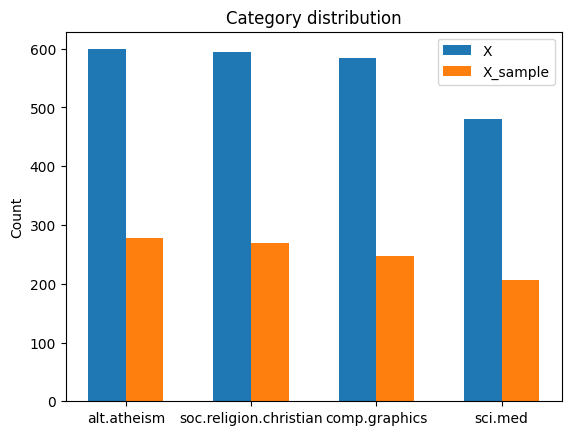

In [214]:
X_data = [x.value_counts().values, xs.value_counts().values]
X_axis = np.arange(len(X_data[0]));

##Plot the categories
plt.bar(X_axis - 0.15, X_data[0], 0.3, label = "X")
plt.bar(X_axis + 0.15, X_data[1], 0.3, label = "X_sample")
plt.xticks(X_axis, categories)
plt.ylabel("Count")
plt.title("Category distribution")
plt.legend()
plt.show()

### **Exercise 10**

We said that the 1 at the beginning of the fifth record represents the 00 term. Notice that there is another 1 in the same record. Can you provide code that can verify what word this 1 represents from the vocabulary. Try to do this as efficient as possible.

In [215]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [216]:
### Create the unigrams column
X['unigrams'] = X['text'].apply(lambda x: dmh.tokenize_text(x))

In [217]:
### Document-term matrix
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text) #learn the vocabulary and return document-term matrix
analyze = count_vect.build_analyzer()
X_counts.shape

(2257, 35788)

**SOLUTION:**

We use numpy's function `np.argwhere()` to obtain the indexes that match the condition `arr[4] > 0`:

In [218]:
arr = X_counts[0:5, 0:100].toarray();
idx = np.argwhere(arr[4]>0)
print(idx)

[[ 0]
 [37]]


Then, the term with index 37 occurs once in the fifth record. This term is obtained as we did previously:

In [219]:
count_vect.get_feature_names_out()[37]

'01'

### **Exercise 11**

From the chart above, we can see how sparse the term-document matrix is; i.e., there is only one terms with frequency of 1 in the subselection of the matrix. By the way, you may have noticed that we only selected 20 articles and 20 terms to plot the histrogram. As an excersise you can try to modify the code above to plot the entire term-document matrix or just a sample of it. How would you do this efficiently? Remember there is a lot of words in the vocab. Report below what methods you would use to get a nice and useful visualization

**SOLUTION**

Plotting the entire term-document matrix is not practical as it is mostly sparse. As in the lab tutorial and Exercise 15 we may aggregate the most frequently occurring terms (top-k) and visualize them in a sample of all the documents.

In [220]:
import seaborn as sns
term_freq = np.flip(np.sort(np.asarray(X_counts.sum(axis=0))));
term_freq_idx = np.flip(np.argsort(np.asarray(X_counts.sum(axis=0)[0])));

k = 30; ##Parameter to control the number of terms we wish to visualize in our graph
x_count = pd.Series(count_vect.get_feature_names_out()).iloc[term_freq_idx[0][0:k]];
y_freq =  pd.Series(term_freq[0][:]).iloc[0:k];
x_count = x_count.array

In [221]:
plot_x = ["term_"+str(i) for i in x_count]
print(plot_x)

['term_the', 'term_of', 'term_to', 'term_and', 'term_is', 'term_in', 'term_that', 'term_it', 'term_you', 'term_for', 'term_not', 'term_this', 'term_be', 'term_from', 'term_are', 'term_edu', 'term_have', 'term_as', 'term_on', 'term_with', 'term_but', 'term_or', 'term_if', 'term_was', 'term_can', 'term_we', 'term_there', 'term_by', 'term_what', 'term_subject']


In [222]:
start = 0;
end = start + k
plot_y = ["doc_"+ str(i) for i in list(X.index)[start:end]]
print(plot_y)

['doc_0', 'doc_1', 'doc_2', 'doc_3', 'doc_4', 'doc_5', 'doc_6', 'doc_7', 'doc_8', 'doc_9', 'doc_10', 'doc_11', 'doc_12', 'doc_13', 'doc_14', 'doc_15', 'doc_16', 'doc_17', 'doc_18', 'doc_19', 'doc_20', 'doc_21', 'doc_22', 'doc_23', 'doc_24', 'doc_25', 'doc_26', 'doc_27', 'doc_28', 'doc_29']


In [223]:
##Plot the new document matrix
plot_z = X_counts.toarray()[start:end] #X_counts[how many documents, how many terms]
filter_indices = pd.Series(term_freq_idx[0][:]).iloc[0:k].values;

plot_z = np.take(plot_z, filter_indices, axis = 1) #Take only indices with highest counts in X_counts
df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
display(df_todraw)

,term_the,term_of,term_to,term_and,term_is,term_in,term_that,term_it,term_you,term_for,...,term_but,term_or,term_if,term_was,term_can,term_we,term_there,term_by,term_what,term_subject
doc_0,5,1,4,0,1,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
doc_1,11,8,4,0,10,2,0,2,0,2,...,0,1,1,0,2,0,1,1,0,1
doc_2,14,10,26,9,4,6,8,8,13,6,...,1,4,7,3,4,3,1,0,2,1
doc_3,6,2,0,1,1,3,0,0,0,1,...,0,2,0,0,1,0,0,0,0,1
doc_4,10,3,8,3,2,3,1,1,1,2,...,0,0,0,0,0,0,1,0,0,1
doc_5,12,6,14,7,7,4,10,1,0,0,...,0,1,0,0,0,0,0,1,1,1
doc_6,3,7,8,7,4,4,2,3,0,5,...,1,4,0,0,2,4,0,0,0,1
doc_7,21,11,11,9,9,3,11,10,0,1,...,4,3,0,3,1,1,1,0,0,1
doc_8,6,4,6,5,5,3,2,2,1,0,...,1,0,0,0,0,0,2,0,1,1
doc_9,10,6,21,23,1,4,18,2,5,3,...,3,1,2,16,0,0,2,0,4,1


We can verify that the term `the` occurs 5 times in the first document (Lines 4, 9, 13, 17 and 18 starting from the top and counting from 1).

In [224]:
print("\n".join(twenty_train.data[0].split("\n")))

From: sd345@city.ac.uk (Michael Collier)
Subject: Converting images to HP LaserJet III?
Nntp-Posting-Host: hampton
Organization: The City University
Lines: 14

Does anyone know of a good way (standard PC application/PD utility) to
convert tif/img/tga files into LaserJet III format.  We would also like to
do the same, converting to HPGL (HP plotter) files.

Please email any response.

Is this the correct group?

Thanks in advance.  Michael.
-- 
Michael Collier (Programmer)                 The Computer Unit,
Email: M.P.Collier@uk.ac.city                The City University,
Tel: 071 477-8000 x3769                      London,
Fax: 071 477-8565                            EC1V 0HB.



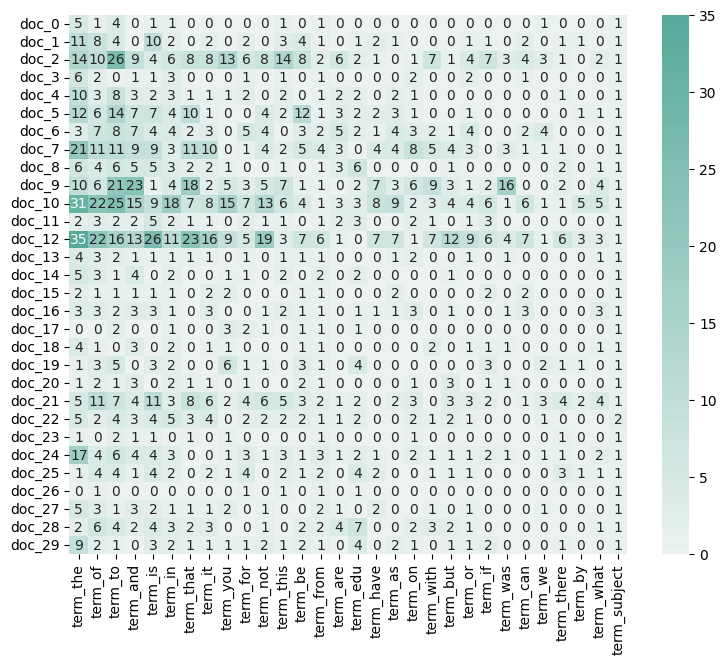

In [225]:
vmin = 0;
vmax = np.max(plot_z)
plt.subplots(figsize=(9, 7))
colormap = sns.color_palette("light:#5A9", as_cmap=True)
ax = sns.heatmap(df_todraw,
                 cmap=colormap,
                 vmin=0, vmax=vmax, annot=True)

### **Exercise 12**

Please try to reduce the dimension to 3, and plot the result use 3-D plot. Use at least 3 different angle (camera position) to check your result and describe what you found.

**SOLUTION:**

In [226]:
from sklearn.decomposition import PCA
X_reduced = PCA(n_components = 3).fit_transform(X_counts.toarray())
print(X_reduced.shape)

(2257, 3)


<Figure size 640x480 with 0 Axes>

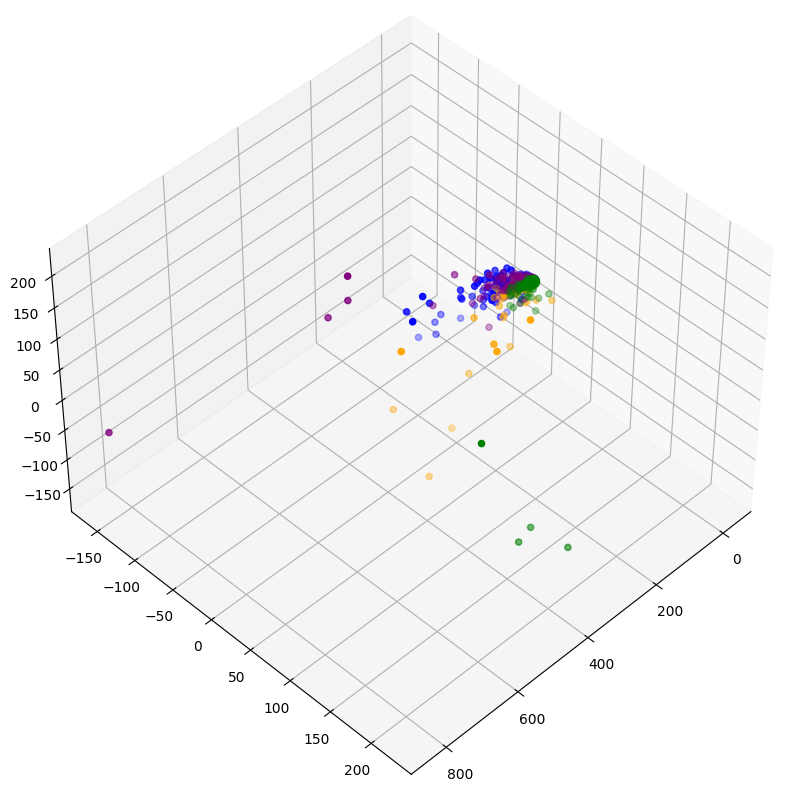

In [227]:
##A helper function to plot 3D scatterplots
def plot3D(X,X_reduced, elev, azimuth, column_name, categories):
    fig = plt.figure()
    fig = plt.figure(figsize = (20,10))

    col = ['purple', 'blue', 'green', 'orange'];
    ax = plt.axes(projection='3d')

    ##Add the data
    for c, category in zip(col, categories):
        xs = X_reduced[X[column_name] == category].T[0]
        ys = X_reduced[X[column_name] == category].T[1]
        zs = X_reduced[X[column_name] == category].T[2]

        ax.view_init(elev, azimuth);
        ax.scatter3D(xs, ys, zs, c = c, marker='o');

plot3D(X,X_reduced, 45,45, 'category_name', categories);

<Figure size 640x480 with 0 Axes>

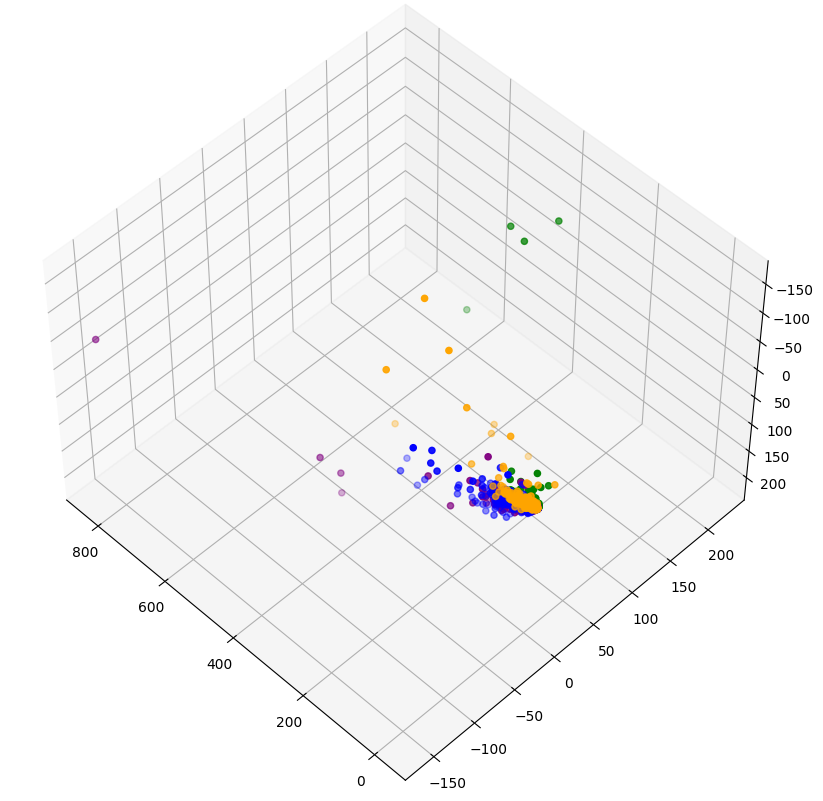

In [228]:
### Figure 2
plot3D(X,X_reduced, -130, 45,'category_name', categories);

<Figure size 640x480 with 0 Axes>

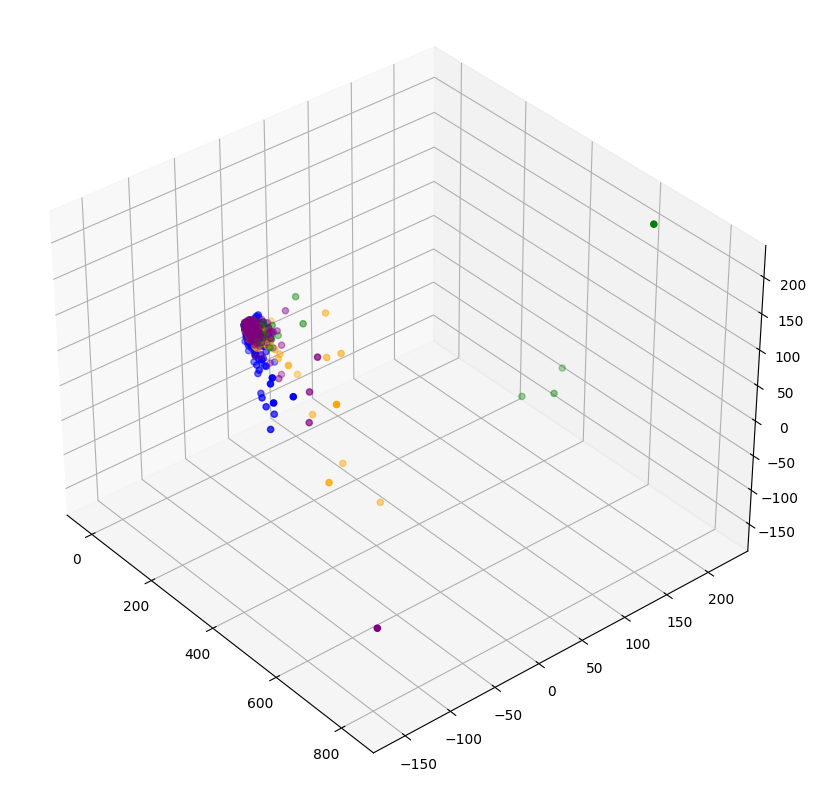

In [229]:
plot3D(X,X_reduced, 35, -40,'category_name', categories);

Using three PCA components, we can observe the separation of the data in their categories a more clear way compared to using a 2D-plot.

### **Exercise 13 - NOT RENDERED IN GITHUB**

If you want a nicer interactive visualization here, I would encourage you try to install and use plotly to achieve this.

In [230]:
import plotly.express as px
k = 100;
term_frequencies = np.asarray(X_counts.sum(axis=0))[0][0:k]

#Create dataframe to plot
px_dF = pd.DataFrame([count_vect.get_feature_names_out()[:k],term_frequencies[0:k]]).T;
px_dF.columns = ['terms', 'counts'];
px_dF.head(10)

,terms,counts
0,00,134
1,000,92
2,0000,1
3,0000001200,2
4,000005102000,1
5,0001,3
6,000100255pixel,1
7,00014,1
8,000406,1
9,0007,1


In [231]:
##plotly plot
fig = px.bar(px_dF, x = 'terms', y = 'counts') ##We index the dataframe by column names and plot the column names automatically
fig.show()

### **Exercise 14**



The chart above only contains 300 vocabulary in the documents, and it's already computationally intensive to both compute and visualize. Can you efficiently reduce the number of terms you want to visualize?

**SOLUTION:**

Suppose we want to compare the distribution of certain terms we are interested in. The `vocabulary_` attribute in our vectorizer is a mapping between the terms and their indexes. With these indexes we can create new dataframes containing only those terms and later visualize and compare their distribution.

In [232]:
count_vect.vocabulary_["the"]

32142

In [233]:
###Suppose we are interested in the following terms:
terms = ['the','please','0','programmer','support', 'harassment'];

def findIdx(terms, vect):
  index_arr = [];
  res = 0;

  for key in terms:
    try:
      res = vect.vocabulary_[key];
      index_arr.append(res);
    except: ##Handle term not present in the vocabulary
      print("The key: ", key, " does not exist in the vocabulary" ); ##Could erase the key from the terms array
  return index_arr

terms = ['please','university','programmer','support', 'harassment','good','bad','professor','data'];
indexes = findIdx(terms, count_vect);
print(terms);
print(indexes);

['please', 'university', 'programmer', 'support', 'harassment', 'good', 'bad', 'professor', 'data']
[25337, 33597, 26175, 31364, 16148, 15576, 6057, 26153, 10699]


In [234]:
###Create a dataframe with the terms of interest
term_freqs= np.take(np.asarray(X_counts.sum(axis=0))[0], indexes)

term_DF = pd.DataFrame([terms, term_freqs]).T;
term_DF.columns = ['terms','frequencies'];
term_DF.head()

,terms,frequencies
0,please,442
1,university,1170
2,programmer,50
3,support,236
4,harassment,4


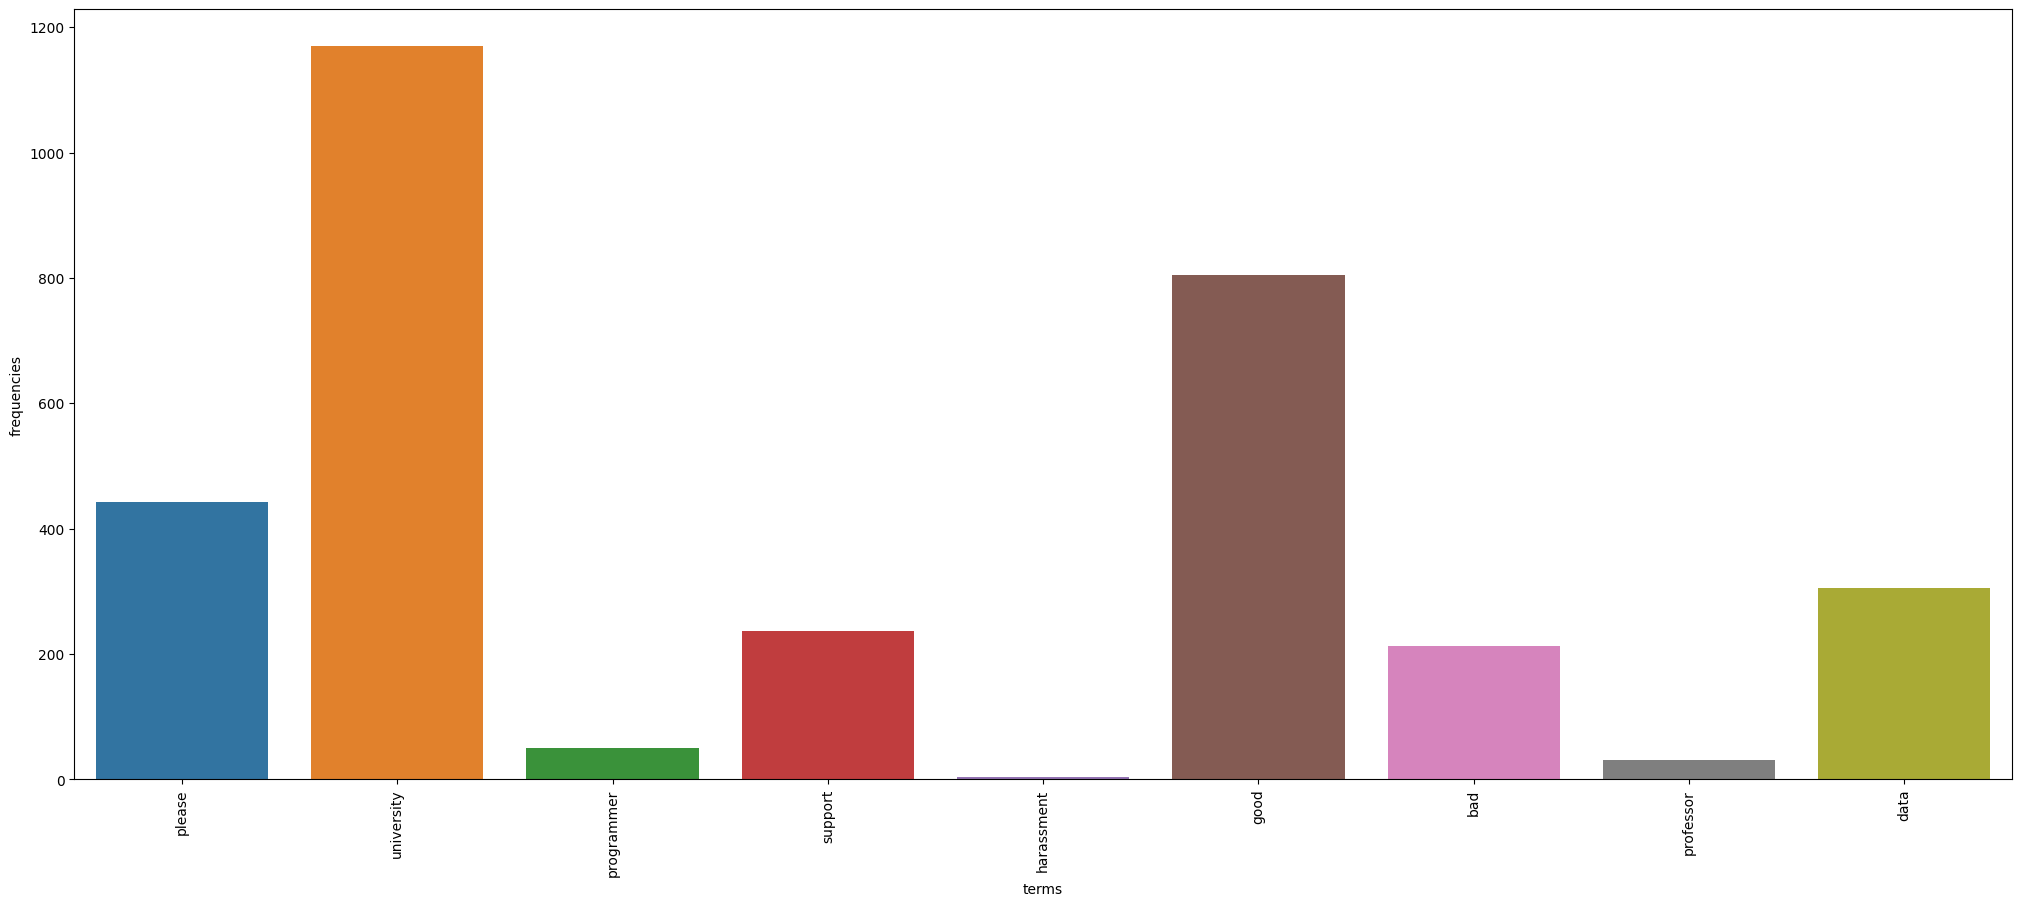

In [235]:
###Plot the distribution of the terms we are interested in:
plt.subplots(figsize=(25, 10))
g = sns.barplot(x=term_DF['terms'], y=term_DF['frequencies']);
g.set_xticklabels(term_DF['terms'], rotation = 90);

This effectively reduces the number of terms we want to visualize. In addition, we can tailor the terms we wish to visualize.

### **Exercise 15**

Additionally, you can attempt to sort the terms on the x-axis by frequency instead of in alphabetical order. This way the visualization is more meaninfgul and you will be able to observe the so called long tail (get familiar with this term since it will appear a lot in data mining and other statistics courses).

**SOLUTION:**

Similar to Exercise 11, let's sort the `term_frequencies` array using `np.sort()` to obtain the terms that occur the most frequently. In addition, we make use of `np.argsort()` to obtain the sequence of indexes that produce a the sorted array. Then, we proceed similarly as in the lab tutorial notebook to visualize the top-k terms that occur most frequently.

In [236]:
term_freq = np.flip(np.sort(np.asarray(X_counts.sum(axis=0))));
term_freq_idx = np.flip(np.argsort(np.asarray(X_counts.sum(axis=0)[0])));

print(term_freq_idx[0][0:10],'\n');
print(term_freq[0][0:10],'\n')
print(pd.Series(count_vect.get_feature_names_out()).iloc[term_freq_idx[0][0:10]])

[32142 23610 32493  4992 18474 17556 32139 18551 35638 14601] 

[29825 17660 17222 13017 12343 11226 10723  8447  6157  5962] 

32142     the
23610      of
32493      to
4992      and
18474      is
17556      in
32139    that
18551      it
35638     you
14601     for
dtype: object


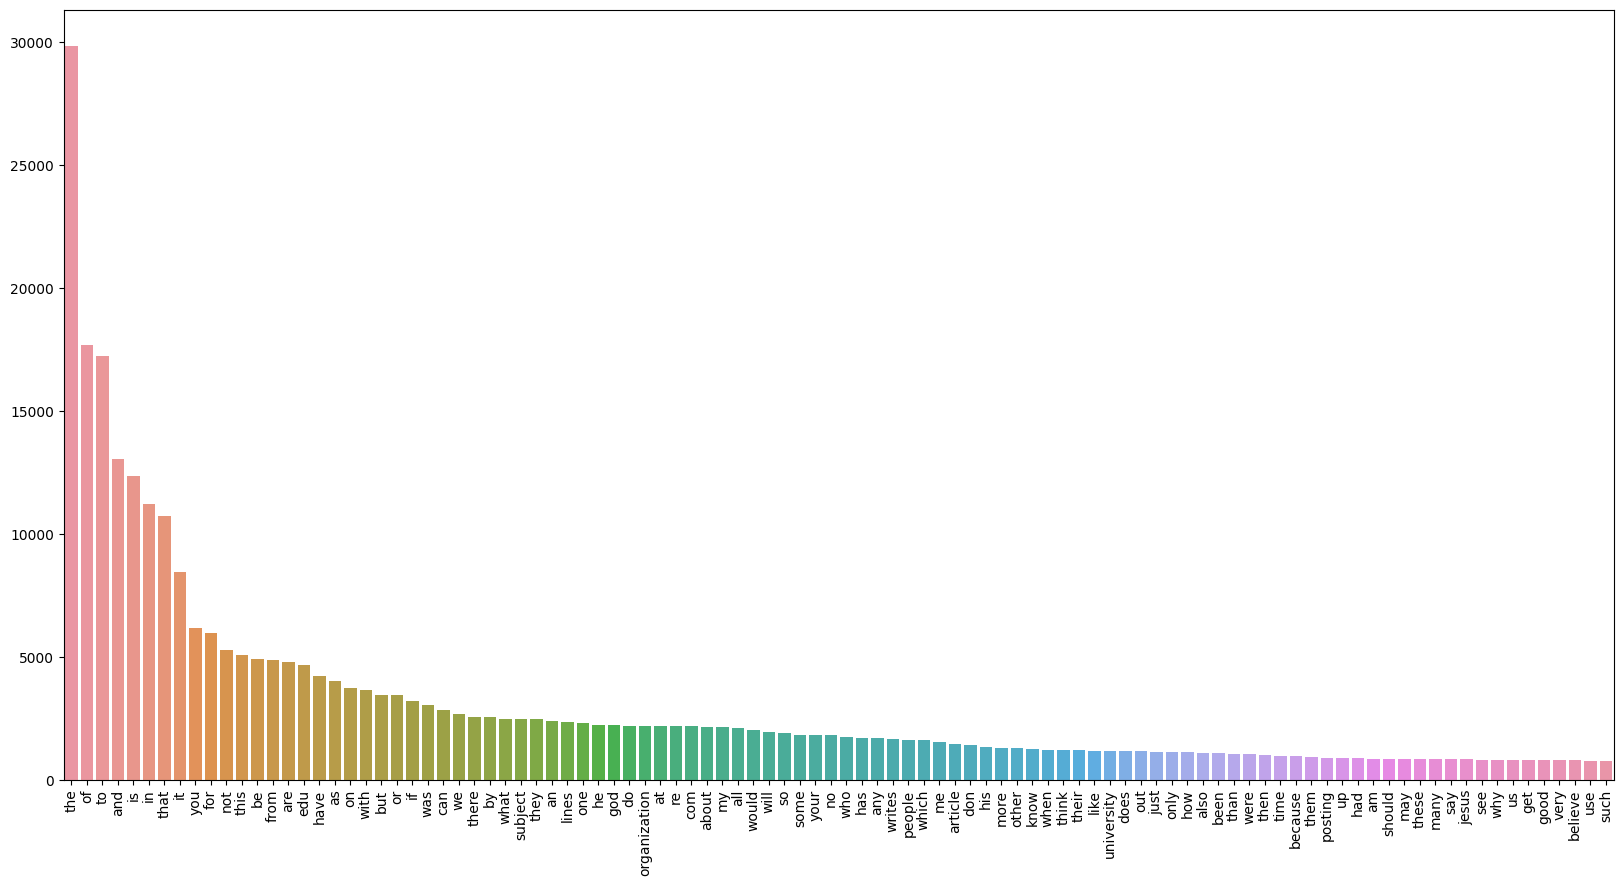

In [237]:
##Plot
k = 100; ##Parameter to control the number of terms we wish to visualize in our graph
x_count = pd.Series(count_vect.get_feature_names_out()).iloc[term_freq_idx[0][0:k]];
y_freq =  pd.Series(term_freq[0][:]).iloc[0:k];
x_count = x_count.array

plt.subplots(figsize=(20, 10))
g = sns.barplot(x = x_count, y = y_freq)
g.set_xticklabels(x_count, rotation = 90);

### **Exercise 16**

Try to generate the binarization using the category_name column instead. Does it work?

**SOLUTION:**

In [238]:
##Imports
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy

mlb = preprocessing.LabelBinarizer();
mlb.fit(X.category)

LabelBinarizer()

In [239]:
X['bin_category'] = mlb.transform(X['category']).tolist();
X.head()

,text,category,category_name,unigrams,bin_category
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics,"[From, :, sd345, @, city.ac.uk, (, Michael, Co...","[0, 1, 0, 0]"
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics,"[From, :, ani, @, ms.uky.edu, (, Aniruddha, B....","[0, 1, 0, 0]"
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3,soc.religion.christian,"[From, :, djohnson, @, cs.ucsd.edu, (, Darin, ...","[0, 0, 0, 1]"
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3,soc.religion.christian,"[From, :, s0612596, @, let.rug.nl, (, M.M, ., ...","[0, 0, 0, 1]"
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,3,soc.religion.christian,"[From, :, stanly, @, grok11.columbiasc.ncr.com...","[0, 0, 0, 1]"


In [240]:
###Let's try to repeat the process above with the category_name column

mlb_cat = preprocessing.LabelBinarizer();
mlb_cat.fit(X.category_name)

LabelBinarizer()

In [241]:
mlb_cat.classes_

array(['alt.atheism', 'comp.graphics', 'sci.med',
       'soc.religion.christian'], dtype='<U22')

In [242]:
X['bin_category_name'] = mlb_cat.transform(X['category_name']).tolist();
X.head()

,text,category,category_name,unigrams,bin_category,bin_category_name
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics,"[From, :, sd345, @, city.ac.uk, (, Michael, Co...","[0, 1, 0, 0]","[0, 1, 0, 0]"
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics,"[From, :, ani, @, ms.uky.edu, (, Aniruddha, B....","[0, 1, 0, 0]","[0, 1, 0, 0]"
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3,soc.religion.christian,"[From, :, djohnson, @, cs.ucsd.edu, (, Darin, ...","[0, 0, 0, 1]","[0, 0, 0, 1]"
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3,soc.religion.christian,"[From, :, s0612596, @, let.rug.nl, (, M.M, ., ...","[0, 0, 0, 1]","[0, 0, 0, 1]"
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,3,soc.religion.christian,"[From, :, stanly, @, grok11.columbiasc.ncr.com...","[0, 0, 0, 1]","[0, 0, 0, 1]"


The LabelBinarizer is also able to perform the one-hot encoding using the category_name as an input.

## **PART II: Sentiment Labelled Sentences Dataset**

### **II.1 Creating our Dataset**

First, we import the necessary modules needed to create the dataset. Some of them were imported previously in this noteboook so make sure to execute the cells above first. We create some lists with useful data such as text file names and website names.

In [243]:
###Imports
import os
import numpy as np
from itertools import chain

###TXT Filenames
txt_files = ["imdb_labelled.txt", "amazon_cells_labelled.txt", "yelp_labelled.txt"];

### Website names and categories
websites = [("imdb",2), ("amazon",3), ("yelp",4)];

The folllowing helper functions read the text files contained in the "sentiment_labelled_sentences" directory (our raw dataset) and parse them into lists containing the text data and targets (either positive or negative reviews).  

In [244]:
###HELPER FUNCTIONS
###Get text (data) and review (target) from list of file lines
def getTextAndReview(file_lines):
  curr_list = [];
  data = [];
  targets = [];

  for st in file_lines:
    curr_list = st.split("\t");
    data.append(str(curr_list[0].strip()));         ##Remove trailing whitespace since its meaningless
    targets.append(int(curr_list[1].rstrip('\n'))); ##Remove the newline character and store as an int

  return [data, targets];

###Parse text file into text (string) and review (int) helper function
def parseTXT(txt_files):
  currFilePath = '';
  file_lines = [];
  data = [];
  targets = []

  ###Open and parse each file
  for file_name in txt_files:
    ##Open the file and read it
    currFilePath = os.path.join(os.getcwd(),"sentiment_labelled_sentences",file_name);
    f = open(currFilePath,'r');
    file_lines = f.readlines();

    ## Process the file and append to data and target lists
    [d, t] = getTextAndReview(file_lines = file_lines);
    data.append(d);
    targets.append(t);

    ## Close the current file
    f.close()

  data = list(chain.from_iterable(data));
  targets = list(chain.from_iterable(targets));
  return [data,targets]

According to the website where we extracted the dataset, there are a total of 3000 review instances among the three websites (imdb, amazon and yelp). For each website there are a total of 1000 reviews. We first show that the length of the returned lists is correct along with the first 5 text data and target instances:

In [245]:
### Verifying correct length of data and target lists
[data, targets] = parseTXT(txt_files);
print(len(data));
print(len(targets));

3000
3000


In [246]:
###First 5 data records
data[0:5]

['A very, very, very slow-moving, aimless movie about a distressed, drifting young man.',
 'Not sure who was more lost - the flat characters or the audience, nearly half of whom walked out.',
 'Attempting artiness with black & white and clever camera angles, the movie disappointed - became even more ridiculous - as the acting was poor and the plot and lines almost non-existent.',
 'Very little music or anything to speak of.',
 'The best scene in the movie was when Gerardo is trying to find a song that keeps running through his head.']

In [247]:
targets[0:5]

[0, 0, 0, 0, 1]

Next, similar to the category_name column in the lab tutorial we may add the website name where the review came from along with a numerical representation or index of the website. For this, we use the *websites* list of tuples we declared above. Since we know we processed the text files in the order shown in the *txt_files* list, we create two lists of size 3000 with 1000 instances of each website name and index.

In [248]:
website_names = [];
website_index = [];
length = 1000;

for tup in websites:
  website_names.append([tup[0]]*length);
  website_index.append([tup[1]]*length);

website_names = list(chain.from_iterable(website_names));
website_index = list(chain.from_iterable(website_index));

### Verify by printing length of the lists and that the first 5 elements of each website is in the correct index (0:5,1000:1005,2000:2005)
print(len(website_names));
print(len(website_index));
for k in range(0,3): print(website_names[k*length:k*length+5], website_index[k*length:k*length+5]);

3000
3000
['imdb', 'imdb', 'imdb', 'imdb', 'imdb'] [2, 2, 2, 2, 2]
['amazon', 'amazon', 'amazon', 'amazon', 'amazon'] [3, 3, 3, 3, 3]
['yelp', 'yelp', 'yelp', 'yelp', 'yelp'] [4, 4, 4, 4, 4]


Finally, from or lists, we create a Pandas dataframe and display some reviews:

In [249]:
DF = pd.DataFrame(np.column_stack([data, website_names, website_index, targets]),
                               columns=['text','website_name', 'website_index', 'target_review'])

In [250]:
DF[:10]

,text,website_name,website_index,target_review
0,"A very, very, very slow-moving, aimless movie ...",imdb,2,0
1,Not sure who was more lost - the flat characte...,imdb,2,0
2,Attempting artiness with black & white and cle...,imdb,2,0
3,Very little music or anything to speak of.,imdb,2,0
4,The best scene in the movie was when Gerardo i...,imdb,2,1
5,"The rest of the movie lacks art, charm, meanin...",imdb,2,0
6,Wasted two hours.,imdb,2,0
7,Saw the movie today and thought it was a good ...,imdb,2,1
8,A bit predictable.,imdb,2,0
9,Loved the casting of Jimmy Buffet as the scien...,imdb,2,1


In [251]:
DF[1000:1010]

,text,website_name,website_index,target_review
1000,So there is no way for me to plug it in here i...,amazon,3,0
1001,"Good case, Excellent value.",amazon,3,1
1002,Great for the jawbone.,amazon,3,1
1003,Tied to charger for conversations lasting more...,amazon,3,0
1004,The mic is great.,amazon,3,1
1005,I have to jiggle the plug to get it to line up...,amazon,3,0
1006,If you have several dozen or several hundred c...,amazon,3,0
1007,If you are Razr owner...you must have this!,amazon,3,1
1008,"Needless to say, I wasted my money.",amazon,3,0
1009,What a waste of money and time!.,amazon,3,0


In [252]:
DF[2000:2010]

,text,website_name,website_index,target_review
2000,Wow... Loved this place.,yelp,4,1
2001,Crust is not good.,yelp,4,0
2002,Not tasty and the texture was just nasty.,yelp,4,0
2003,Stopped by during the late May bank holiday of...,yelp,4,1
2004,The selection on the menu was great and so wer...,yelp,4,1
2005,Now I am getting angry and I want my damn pho.,yelp,4,0
2006,Honeslty it didn't taste THAT fresh.),yelp,4,0
2007,The potatoes were like rubber and you could te...,yelp,4,0
2008,The fries were great too.,yelp,4,1
2009,A great touch.,yelp,4,1


### **II.2 Data Mining using Pandas**


#### **II.2.1 Missing values**

We first check for missing values as we did in section 4.1 of the lab tutorial. According to the dataset's website. There are no missing values in our dataset. We verify this by using the data mining helper function `check_missing_values()`.


In [253]:
DF.isnull().apply(lambda x: dmh.check_missing_values(x))

,text,website_name,website_index,target_review
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,0,0


Row-wise, we will observe there are no missing values either:

In [254]:
DF.isnull().apply(lambda x: dmh.check_missing_values(x), axis = 1)

0       (The amoung of missing records is: , 0)
1       (The amoung of missing records is: , 0)
2       (The amoung of missing records is: , 0)
3       (The amoung of missing records is: , 0)
4       (The amoung of missing records is: , 0)
                         ...                   
2995    (The amoung of missing records is: , 0)
2996    (The amoung of missing records is: , 0)
2997    (The amoung of missing records is: , 0)
2998    (The amoung of missing records is: , 0)
2999    (The amoung of missing records is: , 0)
Length: 3000, dtype: object

Next we check for duplicated values in our dataset as in section 4.2:

#### **II.2.2 Duplicated values**

In [255]:
print(DF.duplicated());
print(np.sum(DF.duplicated()));

0       False
1       False
2       False
3       False
4       False
        ...  
2995    False
2996    False
2997    False
2998    False
2999    False
Length: 3000, dtype: bool
17


Seems there are 17 duplicated records, let's see where they are by indexing:

In [256]:
DF[DF.duplicated(keep = False) == True]

,text,website_name,website_index,target_review
90,Definitely worth checking out.,imdb,2,1
125,10/10,imdb,2,1
363,Definitely worth checking out.,imdb,2,1
572,Not recommended.,imdb,2,0
585,Not recommended.,imdb,2,0
788,10/10,imdb,2,1
1018,Works great!.,amazon,3,1
1179,If you like a loud buzzing to override all you...,amazon,3,0
1180,Don't buy this product.,amazon,3,0
1187,Great phone!.,amazon,3,1


Now, we proceed to drop these duplicates since they **seem** to be irrelevant. Note however, that reviews such as *I love this place* or *great phone* might refer to different locations or products. Given that we have no further data linking these reviews to other variables, we can say is safe to drop these records.

In [257]:
DF.drop_duplicates(keep = 'first', inplace = True);
print('The new length of the dataframe is: ', len(DF));

The new length of the dataframe is:  2983


Then, 17 records have been succesfully dropped.

### **II.3 Data Preprocessing**

#### **II.3.1 Sampling**

In [258]:
DF_sample = DF.sample(n=1500,random_state=42) #random state
display(DF_sample)

,text,website_name,website_index,target_review
2423,We've tried to like this place but after 10+ t...,yelp,4,0
1554,I give Wirefly 1 star.I will contact Cingular/...,amazon,3,0
884,This is probably one of the least effective an...,imdb,2,0
331,"For those that haven't seen it, don't waste yo...",imdb,2,0
1848,Not good enough for the price.,amazon,3,0
...,...,...,...,...
2031,This was like the final blow!,yelp,4,0
2358,Best fish I've ever had in my life!,yelp,4,1
1857,(It works!),amazon,3,1
1657,"The handsfree part works fine, but then the ca...",amazon,3,1


Let's observe the distribution of each website review in both the sample and the original dataset:

imdb      997
yelp      996
amazon    990
Name: website_name, dtype: int64


<Axes: title={'center': 'Review distribution of original dataset'}>

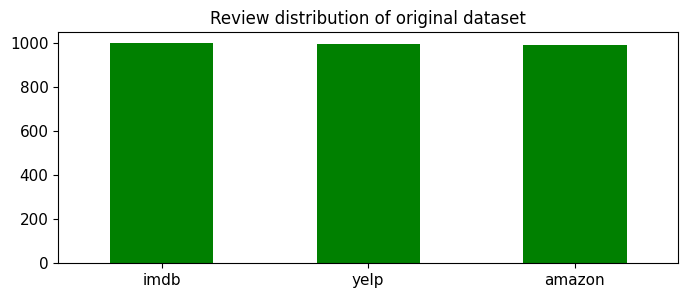

In [259]:
print(DF.website_name.value_counts())

DF.website_name.value_counts().plot(kind = 'bar',
                                    title = 'Review distribution of original dataset',
                                    ylim = [0,np.max(DF.website_name.value_counts())+50],
                                    rot = 0, fontsize = 11, figsize = (8,3), color = 'green')

imdb      506
yelp      502
amazon    492
Name: website_name, dtype: int64


<Axes: title={'center': 'Review distribution of original dataset'}>

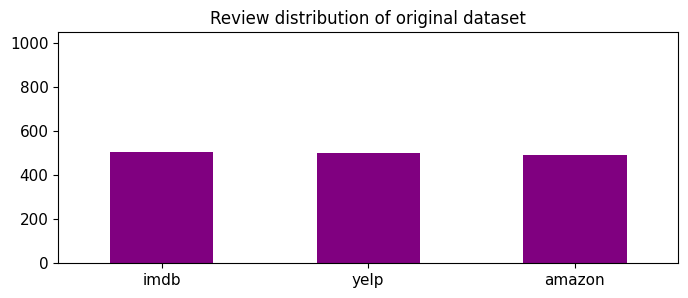

In [260]:
print(DF_sample.website_name.value_counts())

DF_sample.website_name.value_counts().plot(kind = 'bar',
                                    title = 'Review distribution of original dataset',
                                    ylim = [0,np.max(DF.website_name.value_counts())+50],
                                    rot = 0, fontsize = 11, figsize = (8,3), color = 'purple')

As in the lab tutorial and Part I, we may plot these distributions side by side and compare the relative frequency of each website in the original dataset and the sample:

In [261]:
##Relative frequency disstribution
dfw = DF.website_name
dfw_s = DF_sample.website_name

x_DFw = pd.DataFrame([dfw.value_counts(),dfw_s.value_counts(),dfw.value_counts(normalize = True), dfw_s.value_counts(normalize = True)]).T
x_DFw.columns = ["websites_DF", "websites_DF_sample", "rfreq_DF", "r_freq_DF_sample"];
x_DFw.head()

,websites_DF,websites_DF_sample,rfreq_DF,r_freq_DF_sample
imdb,997.0,506.0,0.334227,0.337333
yelp,996.0,502.0,0.333892,0.334667
amazon,990.0,492.0,0.331881,0.328000


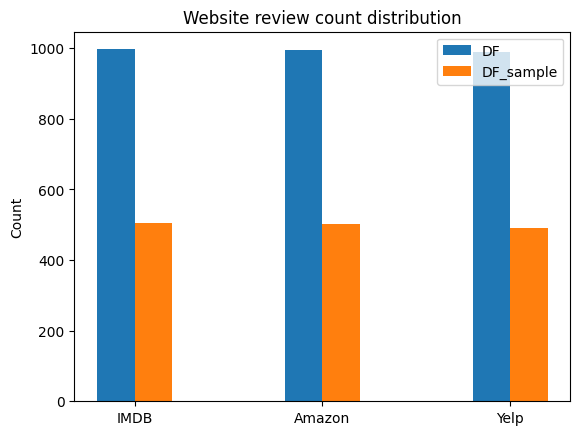

In [262]:
##Side-by-side plot
DF_data = [dfw.value_counts().values, dfw_s.value_counts().values]
DF_axis = np.arange(len(DF_data[0]));

##Plot the categories
plt.bar(DF_axis - 0.1, DF_data[0], 0.2, label = "DF")
plt.bar(DF_axis + 0.1, DF_data[1], 0.2, label = "DF_sample")
plt.xticks(DF_axis, ["IMDB","Amazon","Yelp"])
plt.ylabel("Count")
plt.title("Website review count distribution")
plt.legend(loc = "best")
plt.show()

#### **II.3.2 Feature Creation**

In [263]:
### Unigram column creation
DF['unigrams'] = DF['text'].apply(lambda x: dmh.tokenize_text(x));
DF.head()

,text,website_name,website_index,target_review,unigrams
0,"A very, very, very slow-moving, aimless movie ...",imdb,2,0,"[A, very, ,, very, ,, very, slow-moving, ,, ai..."
1,Not sure who was more lost - the flat characte...,imdb,2,0,"[Not, sure, who, was, more, lost, -, the, flat..."
2,Attempting artiness with black & white and cle...,imdb,2,0,"[Attempting, artiness, with, black, &, white, ..."
3,Very little music or anything to speak of.,imdb,2,0,"[Very, little, music, or, anything, to, speak,..."
4,The best scene in the movie was when Gerardo i...,imdb,2,1,"[The, best, scene, in, the, movie, was, when, ..."


#### **II.3.3 Feature Subset Creation**

In [264]:
### Creating the document term matrix
count_vect2 = CountVectorizer()
DF_counts = count_vect2.fit_transform(DF.text) #Learn the vocabulary and return document-term matrix
print(DF_counts.shape)
print(DF_counts[0])

(2983, 5155)
  (0, 4890)	3
  (0, 4133)	1
  (0, 2956)	1
  (0, 166)	1
  (0, 2954)	1
  (0, 75)	1
  (0, 1331)	1
  (0, 1401)	1
  (0, 5139)	1
  (0, 2764)	1


In [265]:
analyze2 = count_vect.build_analyzer()
analyze(" ".join(list(DF[:1].text)))

['very',
 'very',
 'very',
 'slow',
 'moving',
 'aimless',
 'movie',
 'about',
 'distressed',
 'drifting',
 'young',
 'man']

As in Part I, wewe may aggregate the most frequently occurring terms (top-k) and visualize them in heatmap containing a sample of all the documents:

In [266]:
term_freq = np.flip(np.sort(np.asarray(DF_counts.sum(axis=0))));
term_freq_idx = np.flip(np.argsort(np.asarray(DF_counts.sum(axis=0)[0])));

k = 30; ##Parameter to control the number of terms we wish to visualize in our graph
df_count = pd.Series(count_vect2.get_feature_names_out()).iloc[term_freq_idx[0][0:k]];
y_freq =  pd.Series(term_freq[0][:]).iloc[0:k];
df_count = df_count.array

plot_df = ["term_"+str(i) for i in df_count]
print(plot_df);

start = 0;
end = start + k
plot_y = ["doc_"+ str(i) for i in list(DF.index)[start:end]]
print(plot_y)

['term_the', 'term_and', 'term_it', 'term_is', 'term_to', 'term_this', 'term_of', 'term_was', 'term_in', 'term_for', 'term_that', 'term_not', 'term_with', 'term_my', 'term_very', 'term_good', 'term_on', 'term_you', 'term_great', 'term_but', 'term_have', 'term_movie', 'term_are', 'term_as', 'term_so', 'term_phone', 'term_film', 'term_be', 'term_all', 'term_one']
['doc_0', 'doc_1', 'doc_2', 'doc_3', 'doc_4', 'doc_5', 'doc_6', 'doc_7', 'doc_8', 'doc_9', 'doc_10', 'doc_11', 'doc_12', 'doc_13', 'doc_14', 'doc_15', 'doc_16', 'doc_17', 'doc_18', 'doc_19', 'doc_20', 'doc_21', 'doc_22', 'doc_23', 'doc_24', 'doc_25', 'doc_26', 'doc_27', 'doc_28', 'doc_29']


In [267]:
##Plot the new document matrix
plot_z = DF_counts.toarray()[start:end] #DF_counts[how many documents, how many terms]
filter_indices = pd.Series(term_freq_idx[0][:]).iloc[0:k].values;

plot_z = np.take(plot_z, filter_indices, axis = 1) #Take only indices with highest counts in X_counts
df_todraw = pd.DataFrame(plot_z, columns = plot_df, index = plot_y)
display(df_todraw)

,term_the,term_and,term_it,term_is,term_to,term_this,term_of,term_was,term_in,term_for,...,term_have,term_movie,term_are,term_as,term_so,term_phone,term_film,term_be,term_all,term_one
doc_0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
doc_1,2,0,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
doc_2,3,3,0,0,0,0,0,1,0,0,...,0,1,0,1,0,0,0,0,0,0
doc_3,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
doc_4,2,0,0,1,1,0,0,1,1,0,...,0,1,0,0,0,0,0,0,0,0
doc_5,2,0,3,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
doc_6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
doc_7,1,1,1,0,0,0,0,1,0,1,...,0,1,0,0,0,0,0,0,0,0
doc_8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
doc_9,2,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0


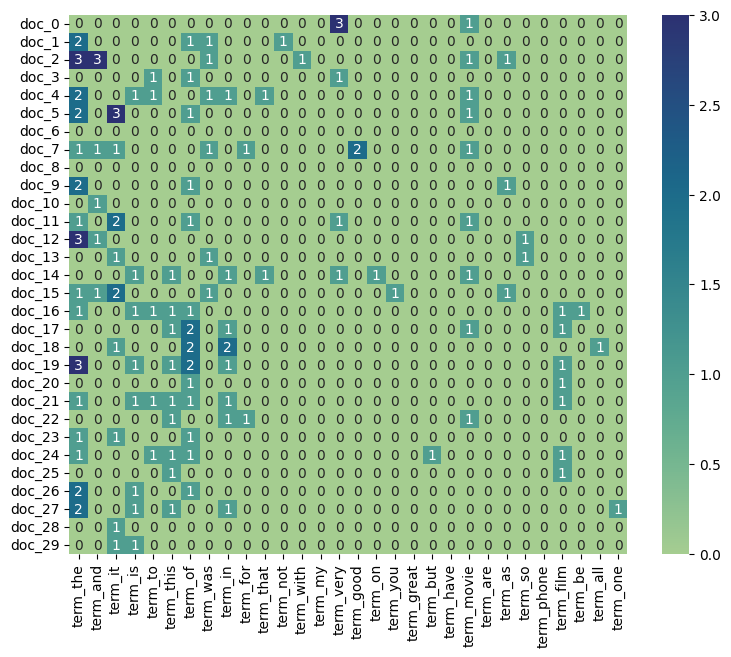

In [268]:
### Plot the heatmap
vmin = 0;
vmax = np.max(plot_z)
plt.subplots(figsize=(9, 7))
colormap = sns.color_palette("crest", as_cmap=True)
ax = sns.heatmap(df_todraw,
                 cmap=colormap,
                 vmin=0, vmax=vmax, annot=True)

#### **II.3.4 Dimensionality Reduction**

Using `n = 3` PCA components, we visualize 3 different angles (camera position) as we did in the lab tutorial:

In [269]:
DF_reduced = PCA(n_components = 3).fit_transform(DF_counts.toarray())
print(DF_reduced.shape)

(2983, 3)


<Figure size 640x480 with 0 Axes>

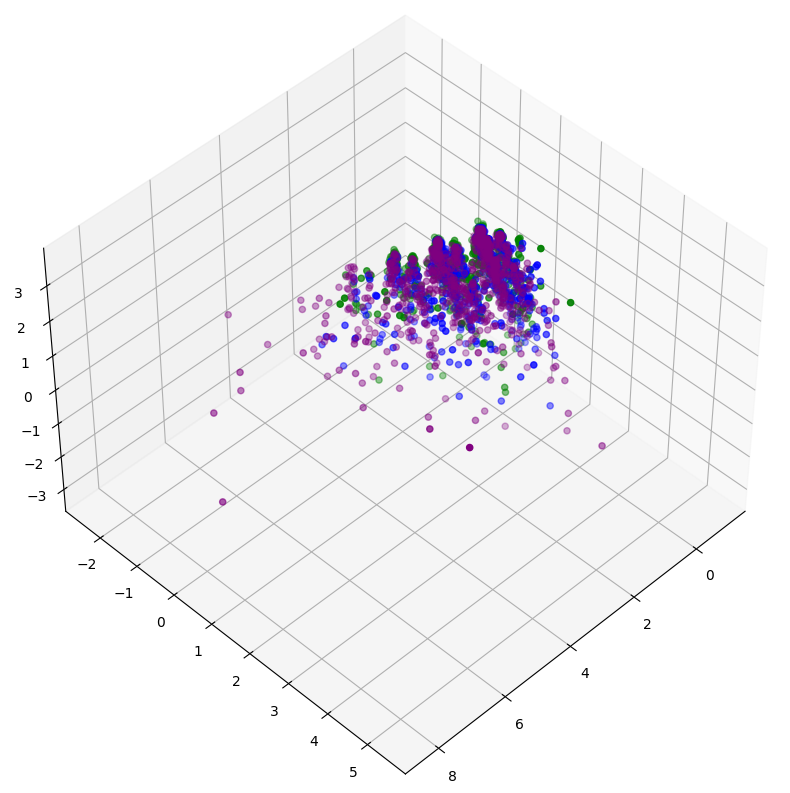

In [270]:
##Begin plots
plot3D(DF,DF_reduced, 45,45, 'website_name', categories = ["imdb","amazon","yelp"]);

<Figure size 640x480 with 0 Axes>

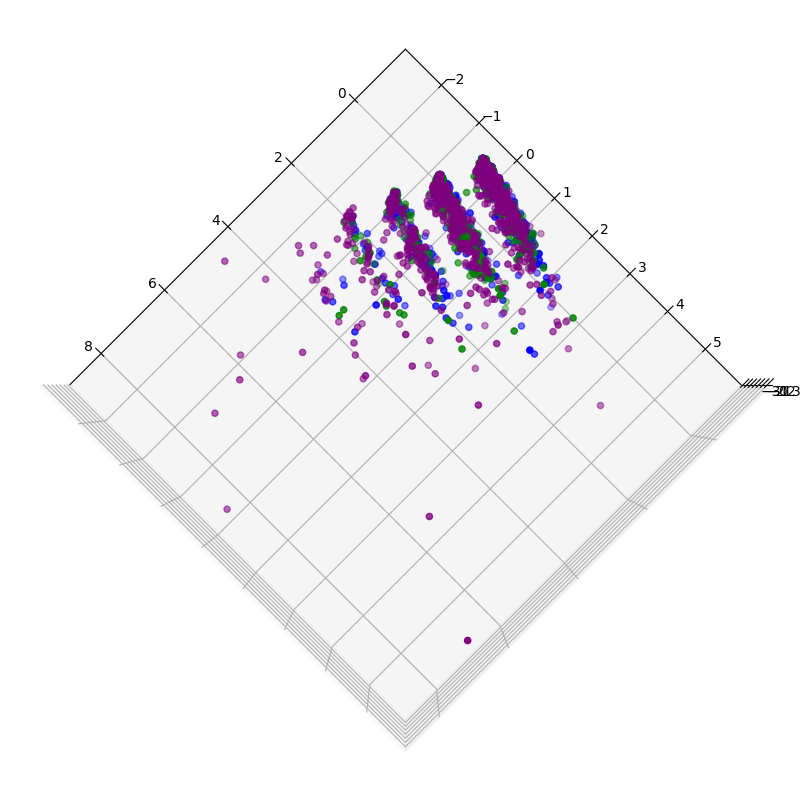

In [271]:
plot3D(DF,DF_reduced, 90, 45,'website_name', categories = ["imdb","amazon","yelp"]);

<Figure size 640x480 with 0 Axes>

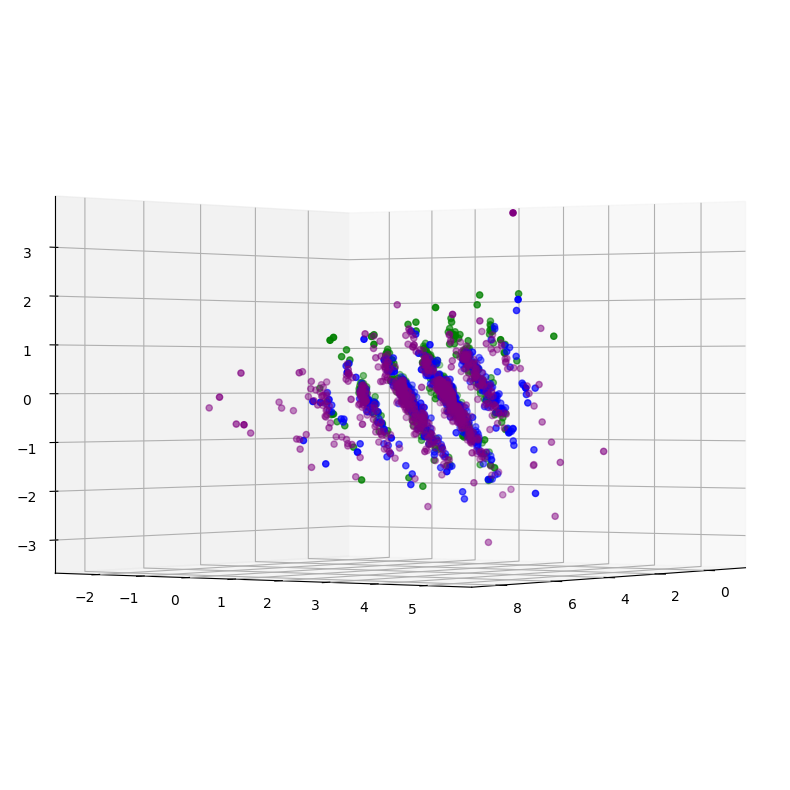

In [272]:
plot3D(DF,DF_reduced, 0, 35,'website_name', categories = ["imdb","amazon","yelp"]);

In this case, we can observe a strong negative linear correlation within the categories. Further analysis is required to understand what each reduced PCA component represents. However, it is pretty interesting to observe this trend one the dimensions are reduced.

#### **II.3.5 Attribute Transformation and Aggregation**

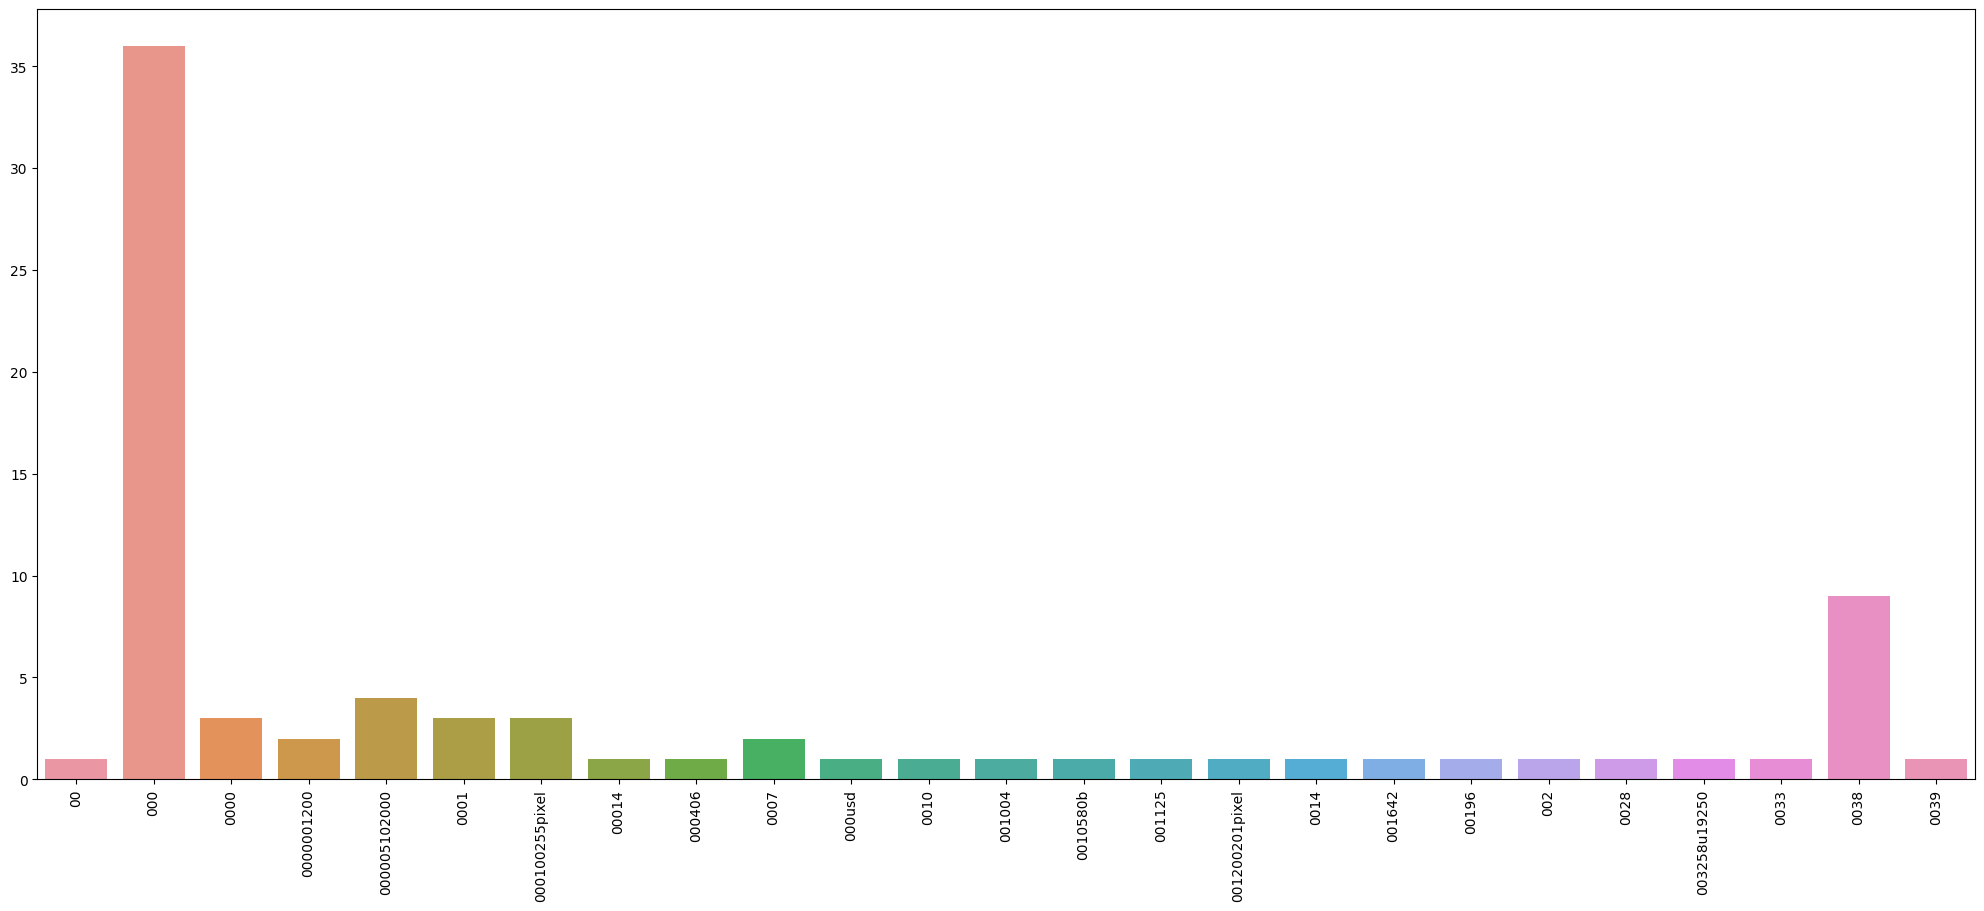

In [273]:
###Agreggated distribution of records;
num_terms = 25;
term_frequencies = np.asarray(DF_counts.sum(axis=0))[0]

##Plot agreggated document term matrix distribution for the first num_terms elements
plt.subplots(figsize=(25, 10))
g = sns.barplot(x=count_vect2.get_feature_names_out()[:num_terms],
            y=term_frequencies[:num_terms])
g.set_xticklabels(count_vect.get_feature_names_out()[:num_terms], rotation = 90);

In [274]:
###Tailored-search term distribution
terms = ['good','bad','movie','food','clean','dirty','long'];
indexes = findIdx(terms, count_vect2);

term_freqs= np.take(np.asarray(DF_counts.sum(axis=0))[0], indexes)

term_DF = pd.DataFrame([terms, term_freqs]).T;
term_DF.columns = ['terms','frequencies'];
term_DF.head()

,terms,frequencies
0,good,230
1,bad,103
2,movie,182
3,food,125
4,clean,9


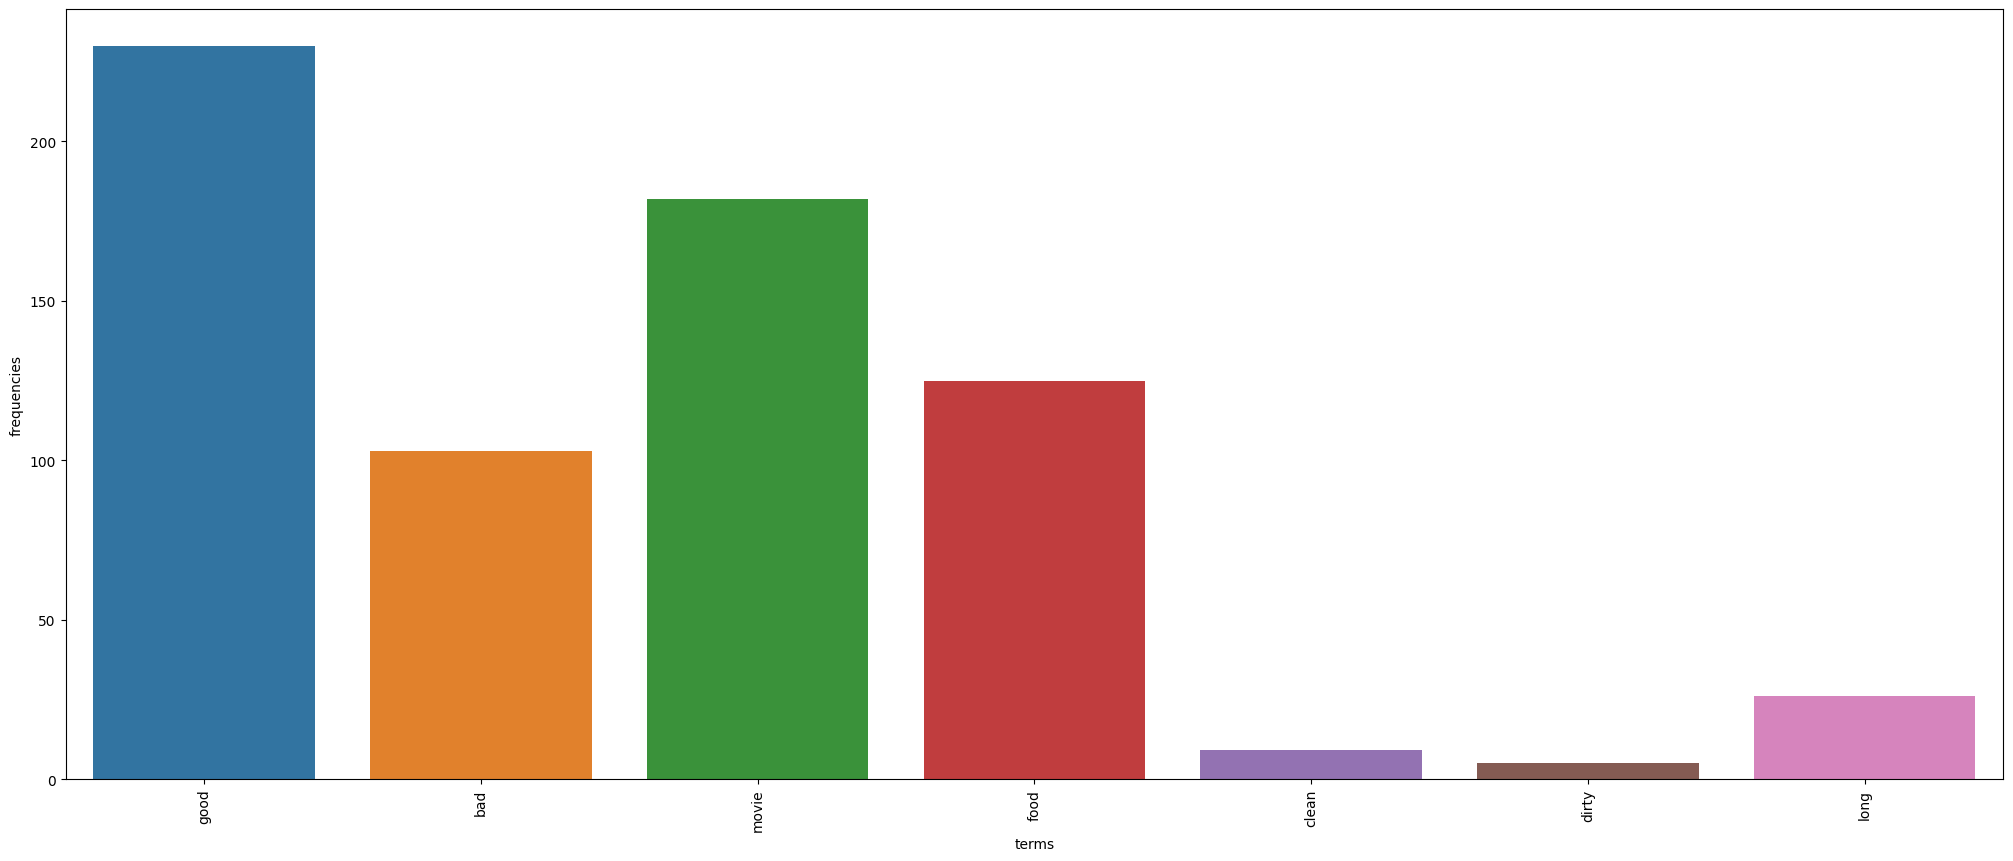

In [275]:
###Plot the distribution of the terms we are interested in:
plt.subplots(figsize=(25, 10))
g = sns.barplot(x=term_DF['terms'], y=term_DF['frequencies']);
g.set_xticklabels(term_DF['terms'], rotation = 90);

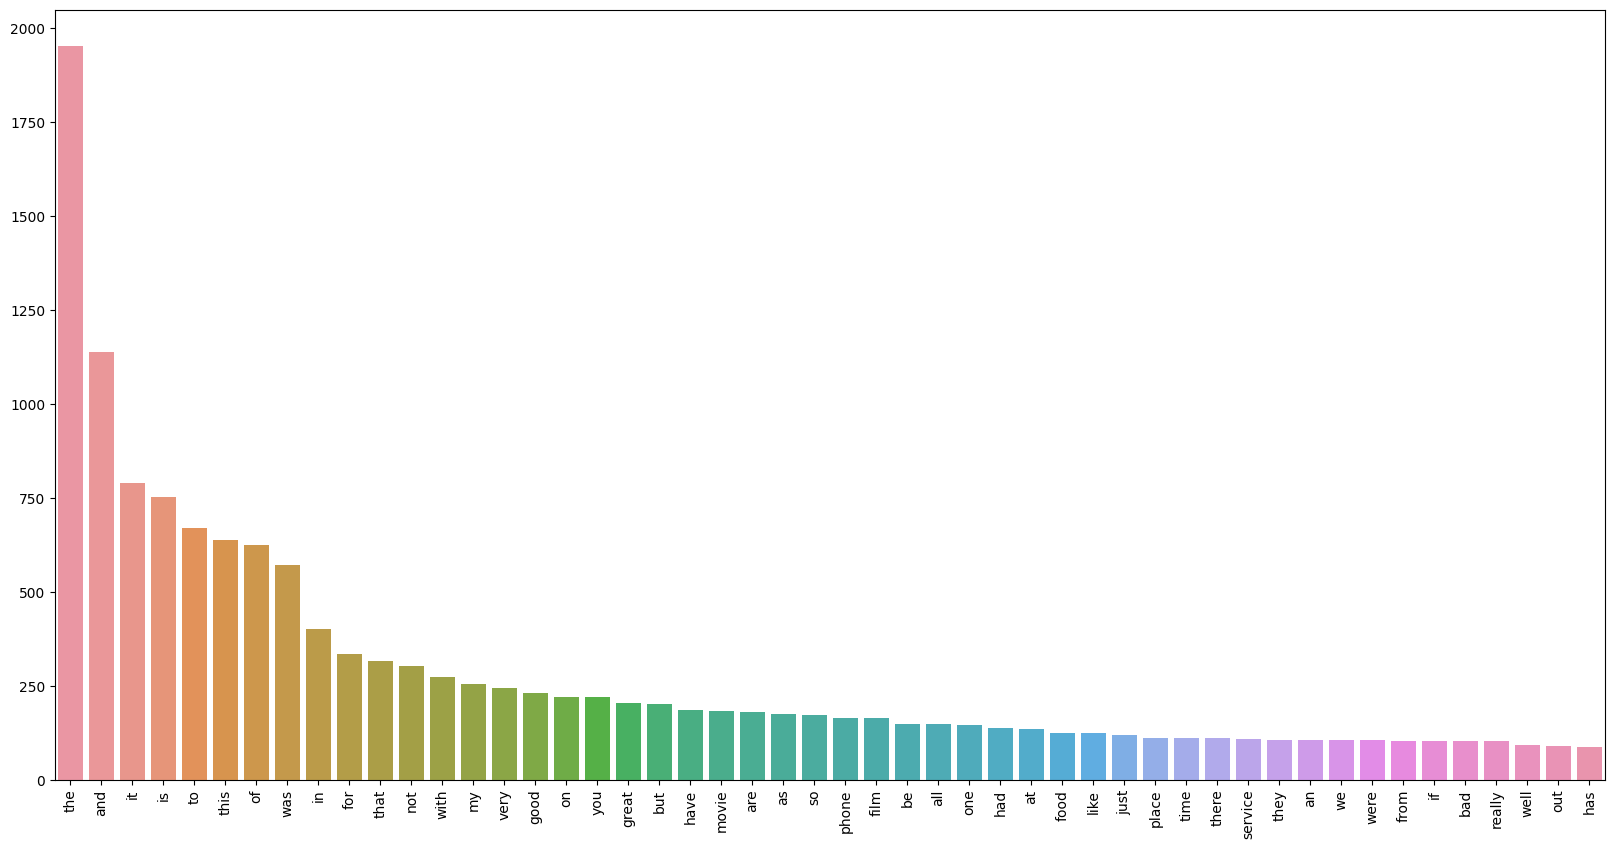

In [276]:
###Long tail plot
k = 50; ##Parameter to control the number of terms we wish to visualize in our graph
df_count = pd.Series(count_vect2.get_feature_names_out()).iloc[term_freq_idx[0][0:k]];
y_freq =  pd.Series(term_freq[0][:]).iloc[0:k];
df_count = df_count.array

plt.subplots(figsize=(20, 10))
g = sns.barplot(x = df_count, y = y_freq)
g.set_xticklabels(df_count, rotation = 90);

#### **II.3.6 Discretization and Binarization**

In [277]:
## Label binarizer
mlb2 = preprocessing.LabelBinarizer()
mlb2.fit(DF_sample.website_index);
DF_sample['bin_web'] = mlb2.transform(DF_sample['website_index']).tolist()

In [278]:
DF_sample.head(10)

,text,website_name,website_index,target_review,bin_web
2423,We've tried to like this place but after 10+ t...,yelp,4,0,"[0, 0, 1]"
1554,I give Wirefly 1 star.I will contact Cingular/...,amazon,3,0,"[0, 1, 0]"
884,This is probably one of the least effective an...,imdb,2,0,"[1, 0, 0]"
331,"For those that haven't seen it, don't waste yo...",imdb,2,0,"[1, 0, 0]"
1848,Not good enough for the price.,amazon,3,0,"[0, 1, 0]"
1245,Worth every penny.,amazon,3,1,"[0, 1, 0]"
680,It was also the right balance of war and love.,imdb,2,1,"[1, 0, 0]"
1219,I'm still infatuated with this phone.,amazon,3,1,"[0, 1, 0]"
1032,It is unusable in a moving car at freeway speed.,amazon,3,0,"[0, 1, 0]"
2037,"Poor service, the waiter made me feel like I w...",yelp,4,0,"[0, 0, 1]"


In [279]:
mlb2 = preprocessing.LabelBinarizer()
mlb2.fit(DF_sample.website_name);
DF_sample['bin_web_name'] = mlb2.transform(DF_sample['website_name']).tolist()
DF_sample.head(10)

,text,website_name,website_index,target_review,bin_web,bin_web_name
2423,We've tried to like this place but after 10+ t...,yelp,4,0,"[0, 0, 1]","[0, 0, 1]"
1554,I give Wirefly 1 star.I will contact Cingular/...,amazon,3,0,"[0, 1, 0]","[1, 0, 0]"
884,This is probably one of the least effective an...,imdb,2,0,"[1, 0, 0]","[0, 1, 0]"
331,"For those that haven't seen it, don't waste yo...",imdb,2,0,"[1, 0, 0]","[0, 1, 0]"
1848,Not good enough for the price.,amazon,3,0,"[0, 1, 0]","[1, 0, 0]"
1245,Worth every penny.,amazon,3,1,"[0, 1, 0]","[1, 0, 0]"
680,It was also the right balance of war and love.,imdb,2,1,"[1, 0, 0]","[0, 1, 0]"
1219,I'm still infatuated with this phone.,amazon,3,1,"[0, 1, 0]","[1, 0, 0]"
1032,It is unusable in a moving car at freeway speed.,amazon,3,0,"[0, 1, 0]","[1, 0, 0]"
2037,"Poor service, the waiter made me feel like I w...",yelp,4,0,"[0, 0, 1]","[0, 0, 1]"


## **PART III: Sentiment Labelled Sentences Dataset - Classification and Visualization**

### **III.1 Classification with Naive-Bayes**

We will begin by generating the TF-IDF features from the tokens of each text to generate the document matrix and implement the Naive Bayes classifier. This will give us a chance to generate some nice visualizations later. Let's begin by importing the necessary modules:

In [280]:
##Imports
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.model_selection import train_test_split

Next, lets instantiate the TfidfVectorizer, split our data into the training and testing sets and get the document term matrices for both training and testing sets.

In [281]:
###Train-test split
X = DF['text'];
y = DF['target_review'];

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=7)

##Instantiate the vectorizers
tf_count_vectorizer = CountVectorizer();
tf_id_vectorizer = TfidfVectorizer();

##Learn the vocabularies and tfs idf and get the document term matrices for each vectorizer
tf_count_X = tf_count_vectorizer.fit_transform(X_train);
tf_tfID_X  = tf_id_vectorizer.fit_transform(X_train);

##Transform documents to document-term matrix.
tf_count_test = tf_count_vectorizer.transform(X_test);
tf_tfID_test  = tf_id_vectorizer.transform(X_test);

Next, we instantiate the naive-bayes classification models for each Vectorizer instance and train them accordingly:

In [282]:
##Train TF
NB_classifier_count = MultinomialNB()
NB_classifier_count.fit(tf_count_X, y_train);

##Train TF_ID
NB_classifier_tfID = MultinomialNB()
NB_classifier_tfID.fit(tf_tfID_X, y_train);


Finally, we compare the performances of both models using prediction accuracy as a metric.

In [283]:
##TF
y_pred_count = NB_classifier_count.predict(tf_count_test);
score_count = metrics.accuracy_score(y_test, y_pred_count)
print("TF model accuracy:" , score_count);

##TF-ID
y_pred_tfID = NB_classifier_tfID.predict(tf_tfID_test);
score_tfID = metrics.accuracy_score(y_test, y_pred_tfID)
print("TF-ID model accuracy:", score_tfID);

TF model accuracy: 0.7979695431472081
TF-ID model accuracy: 0.8


The TF-ID model has slightly better performance based on the above results. The achieved accuracies are adequate for the model we selected, however, it would also be interesting to consider both classic ML-based classifiers such as SVMs or Neural Networks and the more modern Deep Learning models such as CNNs and deep neural networks.

### **III.2 New visualizations**

We can also visualize the performance of our models with confusion matrices by comparing the instances were our model prediction yielded a negative review (0) when a positive review (1) was expected and vice versa. Of course, we exepcted the amount of these wrong predictions to be lower than the correct ones given that our models achieved a respectable accuracy. We show the confusion matrices for both models below:

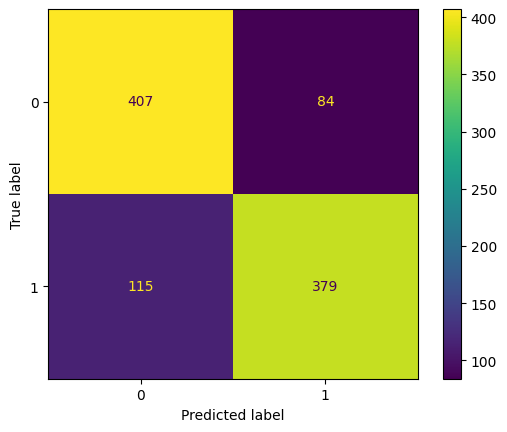

In [284]:
###Confusion matrix plots
###TF - CountVectorizer
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm1 = confusion_matrix(y_test, y_pred_count);
cm1_disp = ConfusionMatrixDisplay(cm1);
cm1_disp.plot();

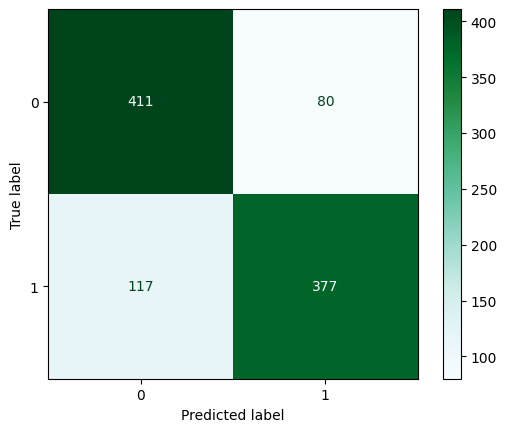

In [285]:
###Confusion matrix plots
###TF_ID - tfIDVectorizer
cm2 = confusion_matrix(y_test, y_pred_tfID);
cm2_disp = ConfusionMatrixDisplay(cm2);
cm2_disp.plot(cmap = 'BuGn');

## **PART IV: Discussion on Data Prepreprocessing improvement**

#### **Observations and things we could improve**

1. **Sampling:** In the lab tutorial we obtained a sample of the original dataframe based on a parameter `n_sample` to control the size of our sample and a `random state` parameter which allowed us reproduce our results consistently. However, while libraries and APIs such as sklearn simplify our workflow, data sampling can always be improved by considering other sampling methods different from random sampling such as stratified or cluster sampling. The availability of sampling techniques allows us to ensure our sample is representative of the whole population

2. **PCA and Dimensionality Reduction:** In the dimensionality reduction section, we either chose the number of dimensions to reduce towards to be either `n=2` or `n=3` for plotting purposes. However, since the end-goal of the PCA algorithm is to "finding a projection that captures the largest amount of variation in the data."  we could have chosen `n=4` or some other value and determine the most suitable number of components to maximize and capture the variation in our data.

3. **Feature Creation** : Creating the unigram column and the unigrams was an interesting example on feature creation. However, we never used this column again in our analysis\. Creating features does not necessarily translate into better performance from our models.
